In [2]:
'''
BALANCE SHEET ANALYSIS IN PYTHON
'''
import requests
import matplotlib.pyplot as plt

api_key= "86fee95cb8740388c3261d5785ff8bde"

company = "FB"
years = 8

balance_sheet = requests.get(f'http://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarterly&limit={years}&apikey={api_key}') 
#print(balance_sheet.json())
balance_sheet = balance_sheet.json()



In [3]:
print(balance_sheet[0].keys())

dict_keys(['date', 'symbol', 'reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'cashAndCashEquivalents', 'shortTermInvestments', 'cashAndShortTermInvestments', 'netReceivables', 'inventory', 'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet', 'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets', 'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets', 'totalNonCurrentAssets', 'otherAssets', 'totalAssets', 'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue', 'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt', 'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities', 'otherLiabilities', 'totalLiabilities', 'commonStock', 'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss', 'othertotalStockholdersEquity', 'totalStockholdersEquity', 'totalLiabilitiesAndStockholdersEquity', 'totalInvestments', 'totalDebt', 'netDebt', 'link', 'finalLink'

In [4]:
# Index 0 is the most recently data we have. It can be the last balance sheet or last quarterly
total_currenct_assets = balance_sheet[0]['totalCurrentAssets']
print(f"total currenct_assets of {company} : {total_currenct_assets:,}")

total currenct_assets of FB : 75,670,000,000


In [5]:
total_current_liabilities = balance_sheet[0]['totalCurrentLiabilities']
print(f"total current liabilities of {company} : {total_current_liabilities:,}")

total current liabilities of FB : 14,981,000,000


In [6]:
total_debt = balance_sheet[0]['totalDebt']
cash_and_equivalent = balance_sheet[0]['cashAndCashEquivalents']
cash_debt_difference = cash_and_equivalent - total_debt
print(f"total Cash Debt Difference of {company} : {cash_debt_difference:,}")

total Cash Debt Difference of FB : 6,922,000,000


In [7]:
# goodwill is 'avviamento' and intangile (assets) are  'beni immateriali'. Goodwill is an intangible Assest.
goodwill_and_intangibles = balance_sheet[0]['goodwillAndIntangibleAssets']
total_assets = balance_sheet[0]['totalAssets']
# How many of the total intangible assets is Goodwill?
pct_intangile = goodwill_and_intangibles / total_assets
print(f"total Percentage of {company} : {pct_intangile * 100: .2f}%") # 12.35% of the Intangible Assets are GoodWill

total Percentage of FB :  12.35%


In [8]:
assetsQ1 = balance_sheet[4]['totalAssets']
assetsQ2 = balance_sheet[3]['totalAssets']
assetsQ3 = balance_sheet[2]['totalAssets']
assetsQ4 = balance_sheet[1]['totalAssets']

assets_data = [assetsQ1, assetsQ2, assetsQ3, assetsQ4]
assets_data = [x/1000000000 for x in assets_data]


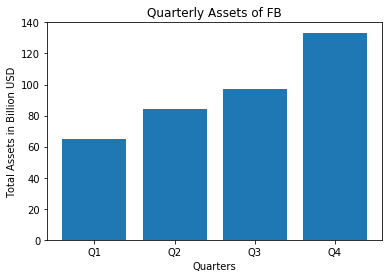

In [9]:
# Remember to change the limit year, which was 2, to 5
plt.bar([1,2,3,4], assets_data)
plt.title(f'Quarterly Assets of {company}')
plt.xlabel('Quarters')
plt.ylabel('Total Assets in Billion USD')
plt.xticks([1,2,3,4], ['Q1', 'Q2', 'Q3', 'Q4' ])
plt.show()

In [10]:
''' 
PROFITABILITIES INDICES 
return on assets, 
return on equity, 
cash return on assets, 
return on debt, 
return on retained earnings, 
return on revenue, 
risk-adjusted return, 
return on invested capital,
return on capital employed
'''

' \nPROFITABILITIES INDICES \nreturn on assets, \nreturn on equity, \ncash return on assets, \nreturn on debt, \nreturn on retained earnings, \nreturn on revenue, \nrisk-adjusted return, \nreturn on invested capital,\nreturn on capital employed\n'

In [11]:
print(balance_sheet[0].keys())

dict_keys(['date', 'symbol', 'reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'cashAndCashEquivalents', 'shortTermInvestments', 'cashAndShortTermInvestments', 'netReceivables', 'inventory', 'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet', 'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets', 'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets', 'totalNonCurrentAssets', 'otherAssets', 'totalAssets', 'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue', 'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt', 'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities', 'otherLiabilities', 'totalLiabilities', 'commonStock', 'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss', 'othertotalStockholdersEquity', 'totalStockholdersEquity', 'totalLiabilitiesAndStockholdersEquity', 'totalInvestments', 'totalDebt', 'netDebt', 'link', 'finalLink'

In [16]:
import pandas as pd

In [17]:
BS_ratios_analysis = {}
for i in range(len(balance_sheet)):
    financial_readiness_index= balance_sheet[i]['totalCurrentAssets']/balance_sheet[i]['totalCurrentLiabilities']
    BS_ratios_analysis[balance_sheet[i]['date']]= financial_readiness_index

df_BS_ratios_analysis= pd.DataFrame(BS_ratios_analysis.items())

df_BS_ratios_analysis = df_BS_ratios_analysis.rename(columns={0 :'Year', 1: 'financialReadinessRatio'})
print(df_BS_ratios_analysis)

         Year  financialReadinessRatio
0  2020-12-31                 5.051065
1  2019-12-31                 4.399455
2  2018-12-31                 7.193958
3  2017-12-31                12.915691
4  2016-12-31                11.965565


In [27]:
'''
Debt-to-equity ratio = total liabilities / total shareholder equity.
'''
for i in range(len(balance_sheet)):
    debtToEquity= balance_sheet[i]['totalLiabilities']/balance_sheet[i]['totalStockholdersEquity']
    BS_ratios_analysis[balance_sheet[i]['date']]= debtToEquity

df_BS_ratios_analysis["debtToEquityRatio"]= debtToEquity
#df_BS_ratios_analysis = df_BS_ratios_analysis.rename(columns={2: 'debtToEquityRatio'})
print(df_BS_ratios_analysis)

         Year  financialReadinessRatio  debtToEquityRatio
0  2020-12-31                 5.051065           0.097425
1  2019-12-31                 4.399455           0.097425
2  2018-12-31                 7.193958           0.097425
3  2017-12-31                12.915691           0.097425
4  2016-12-31                11.965565           0.097425


In [ ]:
'''
Solvency ratio = (Total Net Income + Depreciation) / Total Liabilities
'''
for i in range(len(balance_sheet)):
    debtToEquity= balance_sheet[i]['totalLiabilities']/balance_sheet[i]['totalStockholdersEquity']
    BS_ratios_analysis[balance_sheet[i]['date']]= debtToEquity

df_BS_ratios_analysis["debtToEquityRatio"]= debtToEquity
#df_BS_ratios_analysis = df_BS_ratios_analysis.rename(columns={2: 'debtToEquityRatio'})
print(df_BS_ratios_analysis)